# Koda za projektno nalogo PR
## Tehnični pregledi motornih vozil v Sloveniji

### Skupina
* Leon Macur - 63180190
* Kevin Mohar - 63180209

### Podatki
podatki -> (OPSI: odprti podatki) https://podatki.gov.si/dataset/rezultati-tehnicnih-pregledov-motornih-vozil \
datoteke -> Porocilo o uspesnosti tp (2019, 2018, 2017, 2016, 2015) \
txt -> tp-2019 \
csv -> tp-(2018, 2017, 2016, 2015)

### Organizacija in branje podatkov:

In [1]:
from datetime import datetime
from csv import DictReader
import numpy as np
import matplotlib.pyplot as plt
import operator
import re

def getDat(datoteka):
    dat = []
    i = 0
    with open(datoteka, "r", encoding="utf8") as datRead:
        for datLine in datRead.readlines():
            dat += [[]]
            for beseda in datLine.split(";"):
                dat[i].append(beseda.strip("\"\n"))
            i += 1
    datRead.close()
    return dat

# dats = [2019, 2018, 2017, 2016, 2015]
dats = [getDat('podatki/Porocilo_o_uspesnosti_tp_2019.txt'), getDat('podatki/Porocilo_o_uspesnosti_tp_2018.csv'),
        getDat('podatki/Porocilo_o_uspesnosti_tp_2017.csv'), getDat('podatki/Porocilo_o_uspesnosti_tp_2016.csv'), 
        getDat('podatki/Porocilo_o_uspesnosti_tp_2015.csv')]

# dat[0] <- header
# dat[#>0] <- vrstica (podatki) o vozilu

#### Vpr1:
V kateri izvajalni enoti so vozila največkrat / najmanjkrat opravila tehnični pregled (skozi leta).

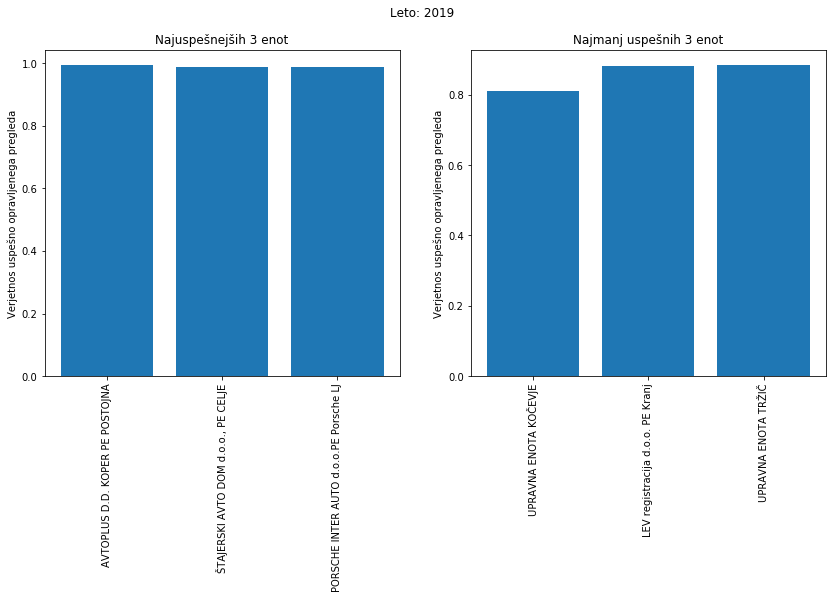

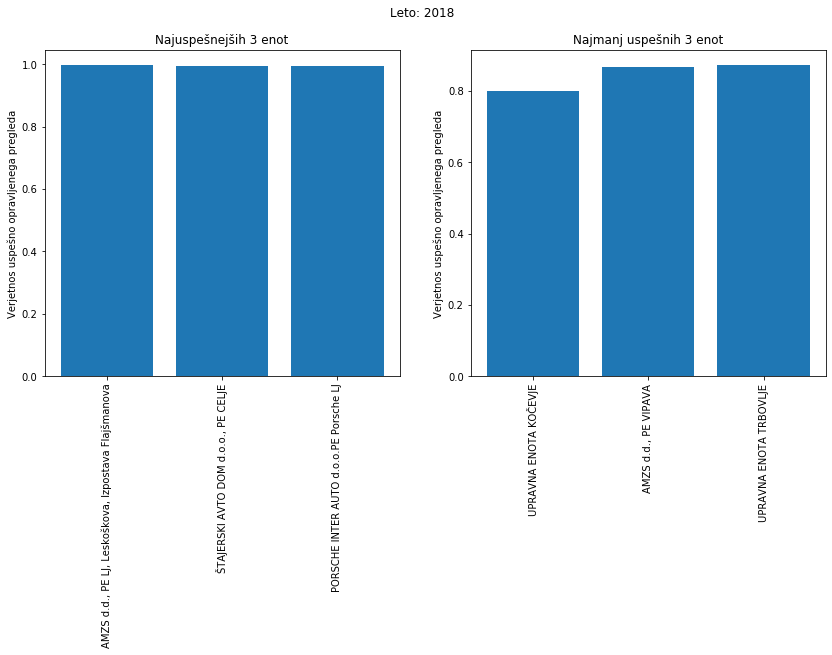

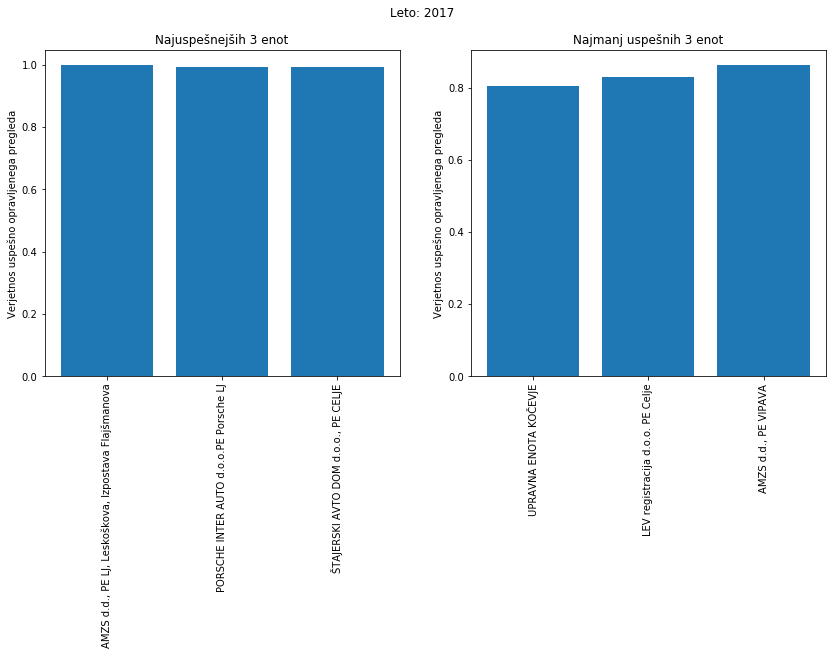

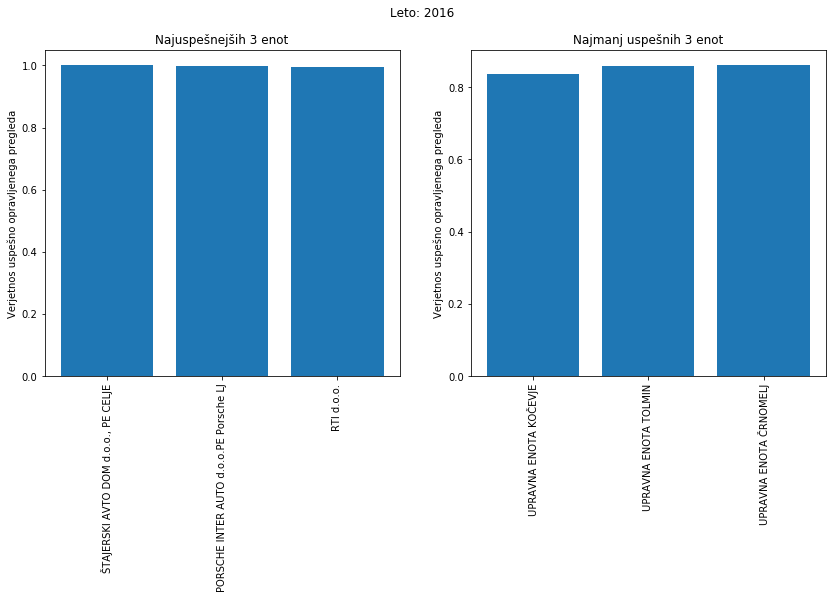

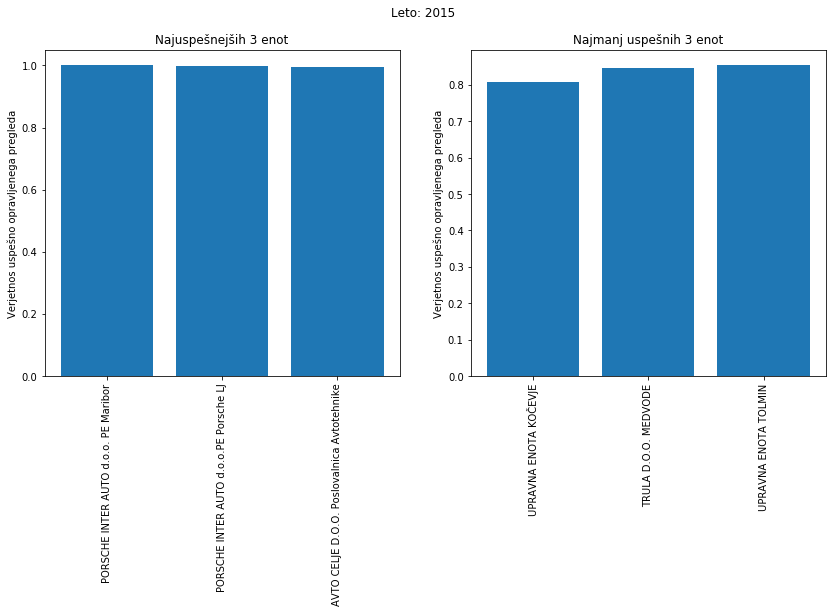

In [2]:
# data[][24] <- Izvajalna enota
# data[][21] <- status opravljenega pregleda (brezhiben=opravil)

for range_dat in range(5):
    # {enota : (st_uspesno_opravljenih_pregledov, št_vseh_vozil_ki_so_v_tej_enoti_opravljala_pregled)}
    stevilPregledovEnot = dict()

    for line in dats[range_dat]:
        if line[24] in stevilPregledovEnot:
            if line[21] == "brezhiben" or line[21] == "pogojno brezhiben":
                stevilPregledovEnot[line[24]][0] += 1
            stevilPregledovEnot[line[24]][1] += 1
        else:
            if line[21] == "brezhiben" or line[21] == "pogojno brezhiben":
                stevilPregledovEnot[line[24]] = [1,1]

    # minimalno št vseh pregledov enote potrebnih da enoto upoštevamo 
    minPregledov = 100

    # {enota : verjetnost_uspešno_opravljenega_pregleda}
    uspesnostEnot = dict()

    for key in stevilPregledovEnot:
        if stevilPregledovEnot[key][1] >= minPregledov:
            uspesnostEnot[key] = stevilPregledovEnot[key][0]/stevilPregledovEnot[key][1]

    uspesnostEnot = dict(sorted(uspesnostEnot.items(), key=operator.itemgetter(1),reverse=True))

    stEnotZaPrikaz = 3


    prikaz = dict()
    i = 0;
    for key in uspesnostEnot:
        if i < 1: najEnota = key
        prikaz[key] = uspesnostEnot[key]
        i+=1
        if i == stEnotZaPrikaz: break
    centers = range(len(prikaz))

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle("Leto: " + str(2019-range_dat))
    
    ax[0].bar(centers, prikaz.values(), align='center', tick_label=prikaz.keys())
    ax[0].set_xticklabels(prikaz.keys(), rotation=90)
    ax[0].set_ylabel("Verjetnos uspešno opravljenega pregleda")
    ax[0].set_title("Najuspešnejših %d enot" % (stEnotZaPrikaz))

    prikaz = dict()
    uspesnostEnot = dict(sorted(uspesnostEnot.items(), key=operator.itemgetter(1),reverse=False))
    i = 0;
    for key in uspesnostEnot:
        prikaz[key] = uspesnostEnot[key]
        i+=1
        if i == stEnotZaPrikaz: break

    centers = range(len(prikaz))
    ax[1].bar(centers, prikaz.values(), align='center', tick_label=prikaz.keys())
    ax[1].set_xticklabels(prikaz.keys(), rotation=90)
    ax[1].set_ylabel("Verjetnos uspešno opravljenega pregleda")
    ax[1].set_title("Najmanj uspešnih %d enot" % (stEnotZaPrikaz))
    plt.show()

#### Vpr2:
V kateri izvajalni enoti so vozila največkrat / najmanjkrat opravila tehnični pregled (vsa leta).

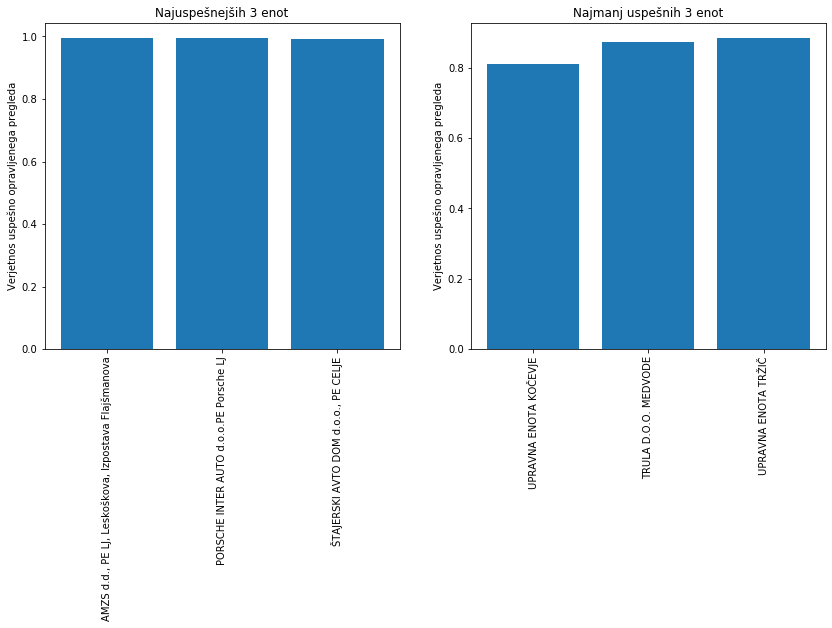

In [3]:
# data[][24] <- Izvajalna enota
# data[][21] <- status opravljenega pregleda (brezhiben=opravil)

# {enota : (st_uspesno_opravljenih_pregledov, št_vseh_vozil_ki_so_v_tej_enoti_opravljala_pregled)}
stevilPregledovEnot = dict()

for range_dat in range(5):
    for line in dats[range_dat]:
        if line[24] in stevilPregledovEnot:
            if line[21] == "brezhiben" or line[21] == "pogojno brezhiben":
                stevilPregledovEnot[line[24]][0] += 1
            stevilPregledovEnot[line[24]][1] += 1
        else:
            if line[21] == "brezhiben" or line[21] == "pogojno brezhiben":
                stevilPregledovEnot[line[24]] = [1,1]

# minimalno št vseh pregledov enote potrebnih da enoto upoštevamo 
minPregledov = 100

# {enota : verjetnost_uspešno_opravljenega_pregleda}
uspesnostEnot = dict()

for key in stevilPregledovEnot:
    if stevilPregledovEnot[key][1] >= minPregledov:
        uspesnostEnot[key] = stevilPregledovEnot[key][0]/stevilPregledovEnot[key][1]

uspesnostEnot = dict(sorted(uspesnostEnot.items(), key=operator.itemgetter(1),reverse=True))

stEnotZaPrikaz = 3


prikaz = dict()
i = 0;
for key in uspesnostEnot:
    if i < 1: najEnota = key
    prikaz[key] = uspesnostEnot[key]
    i+=1
    if i == stEnotZaPrikaz: break
centers = range(len(prikaz))

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(centers, prikaz.values(), align='center', tick_label=prikaz.keys())
ax[0].set_xticklabels(prikaz.keys(), rotation=90)
ax[0].set_ylabel("Verjetnos uspešno opravljenega pregleda")
ax[0].set_title("Najuspešnejših %d enot" % (stEnotZaPrikaz))

prikaz = dict()
uspesnostEnot = dict(sorted(uspesnostEnot.items(), key=operator.itemgetter(1),reverse=False))
i = 0;
for key in uspesnostEnot:
    prikaz[key] = uspesnostEnot[key]
    i+=1
    if i == stEnotZaPrikaz: break

centers = range(len(prikaz))
ax[1].bar(centers, prikaz.values(), align='center', tick_label=prikaz.keys())
ax[1].set_xticklabels(prikaz.keys(), rotation=90)
ax[1].set_ylabel("Verjetnos uspešno opravljenega pregleda")
ax[1].set_title("Najmanj uspešnih %d enot" % (stEnotZaPrikaz))
plt.show()